### Questions
- Column Stores vs Key: Value 
- RDDs

### Objectives
YWBAT
* write data into a mongo db
* read data from a mongo db

## Steps to run Mongo and PyMongo
* Step 1: Run `mongod` in your terminal
* Step 2: Connect using pymongo Client specifying host and port
* Step 3: Have fun! Or don't...I don't know...

### Outline
* Questions
* Objectives
* 

In [2]:
import json
import requests
import tweepy

import pandas as pd
import numpy as np
from PIL import Image, ImageShow
from io import StringIO, BytesIO

from pymongo import MongoClient

from sklearn.datasets import load_boston

import matplotlib.pyplot as plt

| SQL | Mongo |
| ----| ------| 
| Database | Database |
| Table    | Collection |
| Records/Rows | Document |

In [2]:
# Let's create a database and a collection and a document

In [9]:
client = MongoClient(host="localhost", port=27017)

In [10]:
client.list_database_names() # show dbs in mongo

['admin', 'config', 'local', 'music_tweets', 'tweets']

In [12]:
new_db = client["new_db"]

In [13]:
students_collection = new_db["students"]

In [17]:
client.list_database_names()

['admin', 'config', 'local', 'music_tweets', 'tweets']

In [15]:
instructors_collection = new_db['instructors']

In [16]:
new_db.list_collection_names()

[]

### Let's populate students


In [21]:
def fill_form():
    form = {}
    
    name = input("Enter Name: ")
    form['name'] = name
    
    age = int(input("Enter Age: "))
    form['age'] = age
    
    favorite_instructor = "Rafael"
    form["favorite_instructor"] = favorite_instructor
    
    favorite_cartoon = input("What's your favorite cartoon? ")
    form["favorite_cartoon"] = favorite_cartoon
    
    state = input("State of Residence")
    form["state"] = state
    
    track = input("What are you studying?\n1. SE\n2. DS\n3.UI/UX")
    form["track"] = track
    return form

In [25]:
def form_input_flow(client, db='new_db', collection='students'):
    form = fill_form()
    
    # created a variable for my collection
    coll = client[db][collection]
    coll.insert_one(form)
    total_docs = coll.count_documents()
    print(f"Inserted a new form, you now have {total_docs} documents in {collection}")
    return None

In [24]:
while True:
    form_input_flow(client=client)

Enter Name: Andrew Smith
Enter Age: 31
What's your favorite cartoon? DBZ
State of ResidenceTX
What are you studying?
1. SE
2. DS
3.UI/UXDS


/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  import sys


Inserted a new form, you now have 1 documents in students
Enter Name: Bryan Jamieson
Enter Age: 24
What's your favorite cartoon? Scoobie-Doo
State of ResidenceOH
What are you studying?
1. SE
2. DS
3.UI/UXDS
Inserted a new form, you now have 2 documents in students
Enter Name: Jeffrey Hinkle
Enter Age: 44
What's your favorite cartoon? Tom and Jerry
State of ResidenceGA
What are you studying?
1. SE
2. DS
3.UI/UXDS
Inserted a new form, you now have 3 documents in students
Enter Name: Dr. Who
Enter Age: 25
What's your favorite cartoon? DBS
State of ResidenceGA
What are you studying?
1. SE
2. DS
3.UI/UXDS
Inserted a new form, you now have 4 documents in students
Enter Name: Mathew Menarchy
Enter Age: 35
What's your favorite cartoon? Animaniacs
State of ResidenceTN
What are you studying?
1. SE
2. DS
3.UI/UXDS
Inserted a new form, you now have 5 documents in students


KeyboardInterrupt: 

### Filling out forms you can almost guarantee this is going into a database

In [27]:
students_collection.count_documents(filter={})

5

In [30]:
list(students_collection.find({"age": {"$gt": 30}}))

[{'_id': ObjectId('5d9f7a4e060ef7ed5960f9d9'),
  'name': 'Andrew Smith',
  'age': 31,
  'favorite_instructor': 'Rafael',
  'favorite_cartoon': 'DBZ',
  'state': 'TX',
  'track': 'DS'},
 {'_id': ObjectId('5d9f7ac1060ef7ed5960f9db'),
  'name': 'Jeffrey Hinkle',
  'age': 44,
  'favorite_instructor': 'Rafael',
  'favorite_cartoon': 'Tom and Jerry',
  'state': 'GA',
  'track': 'DS'},
 {'_id': ObjectId('5d9f7b1e060ef7ed5960f9dd'),
  'name': 'Mathew Menarchy',
  'age': 35,
  'favorite_instructor': 'Rafael',
  'favorite_cartoon': 'Animaniacs',
  'state': 'TN',
  'track': 'DS'}]

In [31]:
new_student = {"name": "The Master"}
students_collection.insert_one(new_student)

list(students_collection.find({}))

[{'_id': ObjectId('5d9f7a4e060ef7ed5960f9d9'),
  'name': 'Andrew Smith',
  'age': 31,
  'favorite_instructor': 'Rafael',
  'favorite_cartoon': 'DBZ',
  'state': 'TX',
  'track': 'DS'},
 {'_id': ObjectId('5d9f7a92060ef7ed5960f9da'),
  'name': 'Bryan Jamieson',
  'age': 24,
  'favorite_instructor': 'Rafael',
  'favorite_cartoon': 'Scoobie-Doo',
  'state': 'OH',
  'track': 'DS'},
 {'_id': ObjectId('5d9f7ac1060ef7ed5960f9db'),
  'name': 'Jeffrey Hinkle',
  'age': 44,
  'favorite_instructor': 'Rafael',
  'favorite_cartoon': 'Tom and Jerry',
  'state': 'GA',
  'track': 'DS'},
 {'_id': ObjectId('5d9f7af3060ef7ed5960f9dc'),
  'name': 'Dr. Who',
  'age': 25,
  'favorite_instructor': 'Rafael',
  'favorite_cartoon': 'DBS',
  'state': 'GA',
  'track': 'DS'},
 {'_id': ObjectId('5d9f7b1e060ef7ed5960f9dd'),
  'name': 'Mathew Menarchy',
  'age': 35,
  'favorite_instructor': 'Rafael',
  'favorite_cartoon': 'Animaniacs',
  'state': 'TN',
  'track': 'DS'},
 {'_id': ObjectId('5d9f7c45060ef7ed5960f9de'), '

In [33]:
df = pd.DataFrame(list(students_collection.find({})))
df.head(10)

,_id,name,age,favorite_instructor,favorite_cartoon,state,track
0,5d9f7a4e060ef7ed5960f9d9,Andrew Smith,31.0,Rafael,DBZ,TX,DS
1,5d9f7a92060ef7ed5960f9da,Bryan Jamieson,24.0,Rafael,Scoobie-Doo,OH,DS
2,5d9f7ac1060ef7ed5960f9db,Jeffrey Hinkle,44.0,Rafael,Tom and Jerry,GA,DS
3,5d9f7af3060ef7ed5960f9dc,Dr. Who,25.0,Rafael,DBS,GA,DS
4,5d9f7b1e060ef7ed5960f9dd,Mathew Menarchy,35.0,Rafael,Animaniacs,TN,DS
5,5d9f7c45060ef7ed5960f9de,The Master,NaN,NaN,NaN,NaN,NaN


### Let's put a dataframe into our mongodb

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names

df = pd.DataFrame(data, columns=features)
df['target'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
boston_collection = new_db['boston']

for index, row in df.iterrows():
    # now insert every row into our collection
    boston_collection.insert_one(dict(row))

df.shape, boston_collection.count_documents({})

((506, 14), 506)

In [43]:
rows = [dict(row) for i, row in df.iterrows()]

boston_collection.insert_many(rows)

boston_collection.count_documents({})

1012

### Let's make a dataframe and store it as a collection of documents

# How can we do this?????......

# Let's scrape some ebay images and store in a Mongo DB

# Step 1 - Get the images

In [5]:
url = "https://www.ebay.com/sch/i.html?_nkw=funko+pop"

In [6]:
req = requests.get(url)

In [7]:
soup = BeautifulSoup(req.content, 'html.parser')

In [8]:
image_urls = [tag.get('src') for tag in soup.find_all("img", class_="s-item__image-img") if tag.get('src').startswith('https://i.ebayimg.com/')]
image_urls

['https://i.ebayimg.com/thumbs/images/g/sfsAAOSwB21c6~bF/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/thYAAOSwARpdArg1/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/RaoAAOSwPYdcbteC/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/JlsAAOSwAYlcsNpc/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/YrMAAOSwZXpc-UBQ/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/4wQAAOSw6GhcdJph/s-l225.jpg',
 'https://i.ebayimg.com/thumbs/images/g/0voAAOSwgRpc8EgZ/s-l225.jpg']

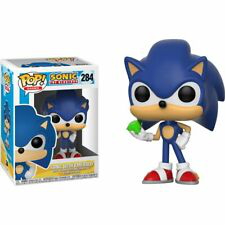

In [10]:
r = requests.get(image_urls[0])
r.content
i = Image.open(BytesIO(r.content))
i

In [12]:
new_db = client['new_db']

In [13]:
funko_coll = new_db['funko']

In [75]:
funko_coll.insert_one({'image_content': r.content})

In [14]:
for url in image_urls:
    r = requests.get(url)
    r.content
    i = Image.open(BytesIO(r.content))
    funko_coll.insert_one({'image_content': r.content})

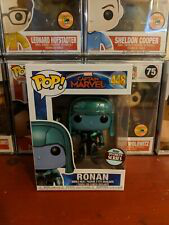

In [16]:
Image.open(BytesIO(list(funko_coll.find({}, {'image_content'}))[-1]['image_content']))

In [92]:
for res in funko_coll.find({}):
    img = Image.open(BytesIO(res['image_content']))
    img.show()

In [17]:
tweets = client['tweets']

In [19]:
donald_tweets = tweets["donald_tweets"]

In [25]:
from pprint import pprint
for tweet in donald_tweets.find({}):
    pprint(tweet)
    break

{'_id': ObjectId('5c8f9c97191c8235fd5613a7'),
 'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Mar 18 13:26:42 +0000 2019',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1107634434432532481',
                        'indices': [117, 140],
                        'url': 'https://t.co/twRWeJ9rFG'}],
              'user_mentions': []},
 'extended_tweet': {'display_text_range': [0, 165],
                    'entities': {'hashtags': [],
                                 'symbols': [],
                                 'urls': [],
                                 'user_mentions': []},
                    'full_text': 'I will have to check my UNFOLLOW group that '
                                 "allows me to see tRUMP's tweets without "
                                 'giving him credit for me or anyone else '
           

### What did we learn today?
* the syntax for mongo is a dictionary
* you can insert dataframes into mongo using iterrows and casting each row as a dictionary
* you can insert anything you want into a mongo collection, even if it's different from the collection
* pandas will impose structure on a dictionary list